In [31]:
import pandas as pd
%matplotlib inline

In [32]:
! bq query --use_legacy_sql=FALSE 'SELECT trip, start_station_name, end_station_name, count(trip) as trip_freq FROM `ambient-cubist-185918.bike_trips_data.results_20171228_104735` GROUP BY trip, start_station_name, end_station_name ORDER BY trip_freq DESC LIMIT 5'


Waiting on bqjob_r1692c4a011005690_000001616781a342_1 ... (0s) Current status: DONE   
+-------+-----------------------------------------+--------------------------------------+-----------+
| trip  |           start_station_name            |           end_station_name           | trip_freq |
+-------+-----------------------------------------+--------------------------------------+-----------+
| 50_60 | Harry Bridges Plaza (Ferry Building)    | Embarcadero at Sansome               |      9150 |
| 69_65 | San Francisco Caltrain 2 (330 Townsend) | Townsend at 7th                      |      8508 |
| 61_50 | 2nd at Townsend                         | Harry Bridges Plaza (Ferry Building) |      7620 |
| 50_61 | Harry Bridges Plaza (Ferry Building)    | 2nd at Townsend                      |      6888 |
| 60_74 | Embarcadero at Sansome                  | Steuart at Market                    |      6874 |
+-------+-----------------------------------------+--------------------------------------

In [33]:
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT trip, start_station_name, end_station_name, count(trip) as trip_freq FROM `ambient-cubist-185918.bike_trips_data.results_20171228_104735` GROUP BY trip, start_station_name, end_station_name ORDER BY trip_freq DESC LIMIT 5' > result.csv


Waiting on bqjob_r7765f1159d9e5705_000001616781b101_1 ... (0s) Current status: DONE   

In [34]:
pop_trips=pd.read_csv('result.csv')

In [35]:
pop_trips

,trip,start_station_name,end_station_name,trip_freq
0,50_60,Harry Bridges Plaza (Ferry Building),Embarcadero at Sansome,9150
1,69_65,San Francisco Caltrain 2 (330 Townsend),Townsend at 7th,8508
2,61_50,2nd at Townsend,Harry Bridges Plaza (Ferry Building),7620
3,50_61,Harry Bridges Plaza (Ferry Building),2nd at Townsend,6888
4,60_74,Embarcadero at Sansome,Steuart at Market,6874


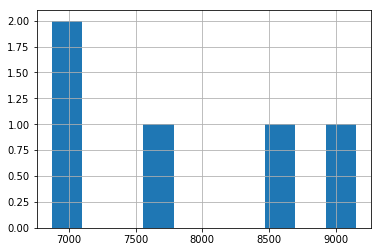

In [36]:
pop_trips.trip_freq.hist()